In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('classification.csv')


In [4]:
def describe_data(df):
    """
    print("This is bold text looks like:",'\033[1m' + 'Buradaki yazılar kalın yazılacaktır' + '\033[0m')

    """
    #print(f"\033[1m İncelenmekte olan df :\033[0m {df.name}\n")
    print(f"\033[1m Genel Yorum :\033[0m \n{df.describe()}\n")
    print(f"\033[1m Hakkında bilgi:\033[0m {df.info()}\n")
    print(f"\033[1m \nSatır adları :\n\033[0m{df.columns}\n")
    print(f"\033[1m \nBoş veriler :\n\033[0m{df.isna().sum()}\n")
    print(f"\033[1m \nİlk 5 veri: \n\033[0m{df.head()}\n")  

In [5]:
describe_data(df)

 Genel Yorum : 
              age    interest     success
count  297.000000  297.000000  297.000000
mean    23.709718   46.986527    0.569024
std      8.864000   21.956447    0.496049
min      2.347560   -0.852800    0.000000
25%     17.002148   28.689067    0.000000
50%     23.283644   45.695926    1.000000
75%     30.661149   65.171876    1.000000
max     45.773729   97.175508    1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB
 Hakkında bilgi: None

 
Satır adları :
Index(['age', 'interest', 'success'], dtype='object')

 
Boş veriler :
age         0
interest    0
success     0
dtype: int64

 
İlk 5 veri: 
         age   interest  success
0  23.657801  18.859917      0.0
1  22.573729  17.9

In [8]:
y = df['success']
X = df.drop(['success'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy of the Logistic Regression on training data: {:.2f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy of the Logistic Regression on test data: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of the Logistic Regression on training data: 0.86
Accuracy of the Logistic Regression on test data: 0.92


In [14]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

print('Accuracy of the Random Forest Classifier on training data: {:.2f}'.format(rand_forest.score(X_train, y_train)))
print('Accuracy of the Random Forest Classifier on test data: {:.2f}'.format(rand_forest.score(X_test, y_test)))

Accuracy of the Random Forest Classifier on training data: 1.00
Accuracy of the Random Forest Classifier on test data: 0.99


# Model complexity

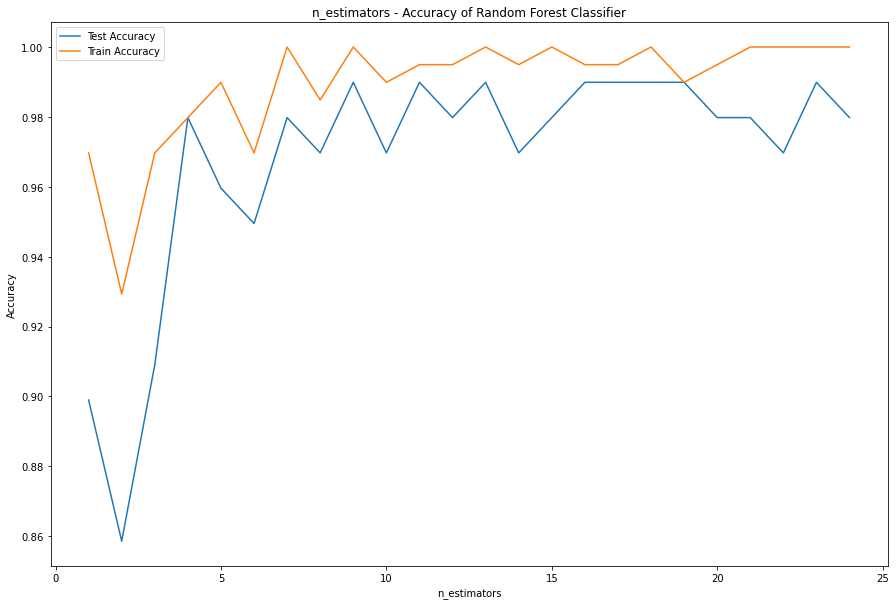

Best Accuracy is 0.98989898989899 with n_estimators = 9


In [23]:
num = np.arange(1,25)
train_acc = []
test_acc = []
for i in num:
    #i in 10 to 400
    rand_forest = RandomForestClassifier(n_estimators=i)
    rand_forest.fit(X_train, y_train)
    train_acc.append(rand_forest.score(X_train, y_train))
    test_acc.append(rand_forest.score(X_test, y_test))
    
#now i'm gonna draw a graph to analyse the values of the n_estimators
plt.figure(figsize=(15,10))
plt.plot(num, test_acc, label='Test Accuracy')
plt.plot(num, train_acc, label='Train Accuracy')
plt.legend()
plt.title('n_estimators - Accuracy of Random Forest Classifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

print('Best Accuracy is {} with n_estimators = {}'.format(np.max(test_acc),test_acc.index(np.max(test_acc))+1))

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
predict = rand_forest.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test, predict))


[[31  1]
 [ 1 66]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        32
         1.0       0.99      0.99      0.99        67

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



# Conclusion

Random Forest Classifier has a better accuracy then Logistic Regression in this situation and the best n_estimator parameter is a 9 to get highest accuracy